# Rent Affordability in NYC Data Set

### Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Import Data set

In [94]:
url = "https://data.cityofnewyork.us/api/views/93d2-wh7s/rows.csv"

df = pd.read_csv(url)

### Explore the data

In [15]:
df.head()

,ProjectID,BuildingID,AffordabilityBand,TotalUnits
0,44218,987329.0,Low Income,101
1,44218,987329.0,Middle Income,200
2,44218,987329.0,Other,2
3,44218,987329.0,Very Low Income,101
4,44223,969695.0,Middle Income,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProjectID          6420 non-null   int64  
 1   BuildingID         6393 non-null   float64
 2   AffordabilityBand  6420 non-null   object 
 3   TotalUnits         6420 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 200.8+ KB


### Transform data

In [98]:
# Search for NaN values in BuildingID column

mask = df["BuildingID"].isnull()
mask
df[mask]

,ProjectID,BuildingID,AffordabilityBand,TotalUnits
175,45223,NaN,Low Income,68
176,45223,NaN,Very Low Income,2
177,45223,NaN,Low Income,43
178,45223,NaN,Other,1
179,45223,NaN,Very Low Income,7
937,49248,NaN,Extremely Low Income,9
938,49248,NaN,Low Income,19
939,49248,NaN,Other,1
940,49248,NaN,Very Low Income,10
1072,49909,NaN,Moderate Income,1


In [99]:
# Drop the NaN values and make the change in the original DataFrame

df.dropna(inplace =  True)
df

,ProjectID,BuildingID,AffordabilityBand,TotalUnits
0,44218,987329.0,Low Income,101
1,44218,987329.0,Middle Income,200
2,44218,987329.0,Other,2
3,44218,987329.0,Very Low Income,101
4,44223,969695.0,Middle Income,6
...,...,...,...,...
6415,50414,66360.0,Low Income,56
6416,50414,118550.0,Low Income,45
6417,50414,66361.0,Low Income,45
6418,50414,66363.0,Low Income,40


In [33]:
# Change the data type in BuildingID column as interger

df["BuildingID"] = df["BuildingID"].astype(int)
df

,ProjectID,BuildingID,AffordabilityBand,TotalUnits
0,44218,987329,Low Income,101
1,44218,987329,Middle Income,200
2,44218,987329,Other,2
3,44218,987329,Very Low Income,101
4,44223,969695,Middle Income,6
...,...,...,...,...
6415,50414,66360,Low Income,56
6416,50414,118550,Low Income,45
6417,50414,66361,Low Income,45
6418,50414,66363,Low Income,40


In [37]:
# Cahnge the column headers

df.columns = ["Project_ID", "Building_ID", "Affordability_Band", "Total_Units"]
df

,Project_ID,Building_ID,Affordability_Band,Total_Units
0,44218,987329,Low Income,101
1,44218,987329,Middle Income,200
2,44218,987329,Other,2
3,44218,987329,Very Low Income,101
4,44223,969695,Middle Income,6
...,...,...,...,...
6415,50414,66360,Low Income,56
6416,50414,118550,Low Income,45
6417,50414,66361,Low Income,45
6418,50414,66363,Low Income,40


### Perform some analysis

In [74]:
# I want to know what is the biggest Affordability Band

affordability = df["Affordability_Band"].value_counts().sort_values(ascending = True)
affordability

Not Applicable            46
Not Defined              112
Middle Income            214
Moderate Income          533
Other                    771
Extremely Low Income    1023
Very Low Income         1620
Low Income              2074
Name: Affordability_Band, dtype: int64

Text(0.5, 1.0, 'Rent Affordability in New York City')

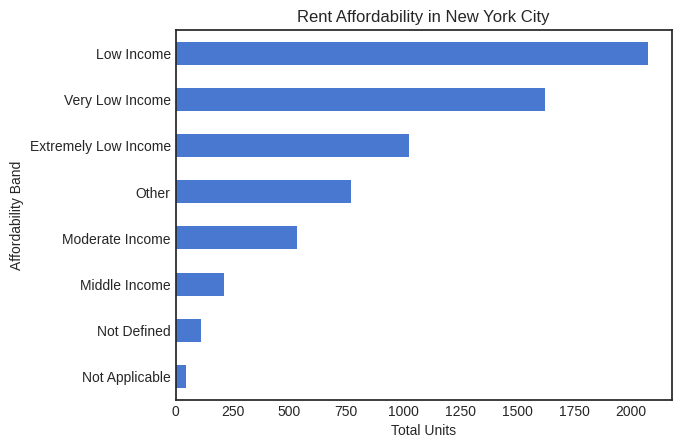

In [76]:
plt.style.use("seaborn-v0_8-muted")

affordability.plot(kind = "barh")
plt.xlabel("Total Units")
plt.ylabel("Affordability Band")
plt.title("Rent Affordability in New York City")

### Pivot Table for summarize the count and mean of Units available

In [92]:
table = df.pivot_table(values = "Total_Units", index = "Affordability_Band", aggfunc = ["count", "mean"])
table

,count,mean
,Total_Units,Total_Units
Affordability_Band,,
Extremely Low Income,1023,27.304985
Low Income,2074,29.074253
Middle Income,214,24.859813
Moderate Income,533,17.121951
Not Applicable,46,145.695652
Not Defined,112,54.401786
Other,771,1.416342
Very Low Income,1620,32.085802
